# **Shopping Trends and Customer Insights: Analysis of Istanbul’s Shopping Malls (2021-2023).**

The dataset provides shopping transaction details from 10 shopping malls in Istanbul between 2021 and 2023, covering various customer demographics such as age and gender, along with key attributes like product categories, payment methods, and transaction dates. The goal of this analysis is to extract actionable insights into shopping behavior, including identifying frequently purchased product combinations through Market Basket Analysis, uncovering upselling and cross-selling opportunities, and predicting customer preferences to personalize product recommendations. Additionally, the analysis aims to identify marketing strategies to boost sales in underperforming malls by understanding patterns and customer engagement gaps. By leveraging these insights, businesses can make data-driven decisions to optimize customer satisfaction, enhance revenue, and improve operational efficiency across malls.

**DATA UNDERSTANDING AND CLEANING.**

In [ ]:
import pandas as pd                     # import required libraries for this project
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/customer_shopping_data (1).csv")    # loading dataset

In [ ]:
print(data.head())            # it gives top 5 rows of dataset

  invoice_no customer_id  gender  age  category  quantity    price  \
0    I138884     C241288  Female   28  Clothing         5  1500.40   
1    I317333     C111565    Male   21     Shoes         3  1800.51   
2    I127801     C266599    Male   20  Clothing         1   300.08   
3    I173702     C988172  Female   66     Shoes         5  3000.85   
4    I337046     C189076  Female   53     Books         4    60.60   

  payment_method invoice_date   shopping_mall  
0    Credit Card   05-08-2022          Kanyon  
1     Debit Card   12-12-2021  Forum Istanbul  
2           Cash   09-11-2021       Metrocity  
3    Credit Card   16-05-2021    Metropol AVM  
4           Cash   24-10-2021          Kanyon  


In [ ]:
print(data.shape)           # it gives number of rows and columns

(99457, 10)


In [ ]:
df1 = pd.DataFrame(data)      # it give list of column names
data.columns

Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'invoice_date', 'shopping_mall'],
      dtype='object')

In [ ]:
print(data.info())                            # it gives data type and non_null count of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB
None


In [ ]:
data['invoice_date'] = pd.to_datetime(data['invoice_date'], format='%d-%m-%Y')    # Convert `invoice_date` to datetime


In [ ]:
data['year'] = data['invoice_date'].dt.year                # Extract year and month from `invoice_date`
data['month'] = data['invoice_date'].dt.month

In [ ]:
                                                 # Ensuring numeric columns have the correct data type
data['age'] = data['age'].astype('int')          # Age is already int64; this ensures consistency
data['quantity'] = data['quantity'].astype('int')  # Quantity as integer
data['price'] = data['price'].astype('float')      # Price as float

# Converting categorical columns to `category` dtype for memory optimization
categorical_columns = ['invoice_no', 'customer_id', 'gender', 'category', 'payment_method', 'shopping_mall']
for col in categorical_columns:
    data[col] = data[col].astype('category')

# Verifying the changes
print(data.dtypes)

invoice_no              category
customer_id             category
gender                  category
age                        int64
category                category
quantity                   int64
price                    float64
payment_method          category
invoice_date      datetime64[ns]
shopping_mall           category
year                       int32
month                      int32
dtype: object


In [ ]:
data.describe()                                          # it give statistical information about numerical values

,age,quantity,price,invoice_date,year,month
count,99457.000000,99457.000000,99457.000000,99457,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321,2022-02-04 02:46:59.783424,2021.629408,6.113898
min,18.000000,1.000000,5.230000,2021-01-01 00:00:00,2021.000000,1.000000
25%,30.000000,2.000000,45.450000,2021-07-19 00:00:00,2021.000000,3.000000
50%,43.000000,3.000000,203.300000,2022-02-05 00:00:00,2022.000000,6.000000
75%,56.000000,4.000000,1200.320000,2022-08-22 00:00:00,2022.000000,9.000000
max,69.000000,5.000000,5250.000000,2023-03-08 00:00:00,2023.000000,12.000000
std,14.990054,1.413025,941.184567,NaN,0.636136,3.569511


In [ ]:
data[data.duplicated()]                    #This line shows that we are checking for the duplicated rows in the dataset

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,year,month


There are no duplicate rows in this data set.

In [ ]:
data.isnull().sum()        # Checking if the dataset has any null values in it

,0
invoice_no,0
customer_id,0
gender,0
age,0
category,0
quantity,0
price,0
payment_method,0
invoice_date,0
shopping_mall,0


We can observe that there is no null values in the dataset.

In [ ]:
data['gender'] = data['gender'].str.strip().str.capitalize()             # Standardize text formatting for string columns
data['payment_method'] = data['payment_method'].str.strip().str.title()
data['shopping_mall'] = data['shopping_mall'].str.strip()
data['category'] = data['category'].str.strip().str.capitalize()

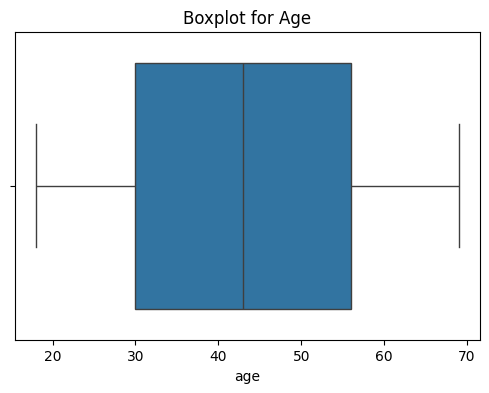

In [ ]:
# Create a boxplot for the age column
plt.figure(figsize=(6, 4))
sns.boxplot(data=data, x='age')
plt.title('Boxplot for Age')
plt.show()

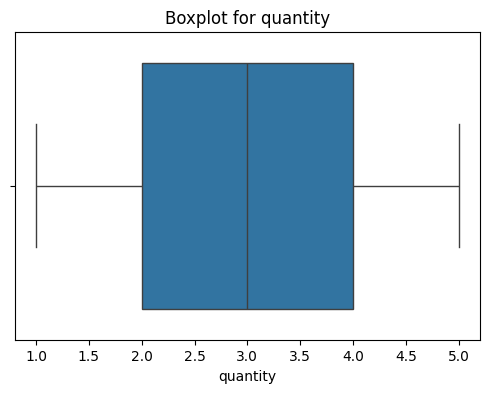

In [ ]:
# Create a boxplot for the quantity column
plt.figure(figsize=(6, 4))
sns.boxplot(data=data, x='quantity')
plt.title('Boxplot for quantity')
plt.show()

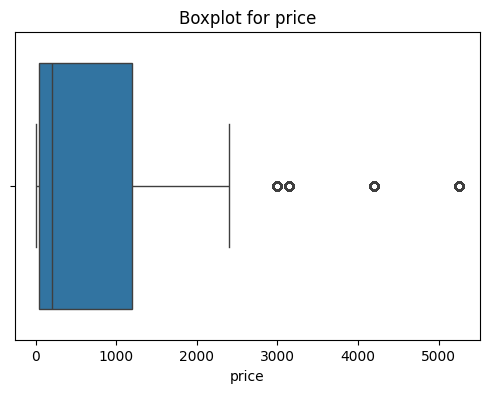

In [ ]:
# Create a boxplot for the price column
plt.figure(figsize=(6, 4))
sns.boxplot(data=data, x='price')
plt.title('Boxplot for price')
plt.show()

The boxplot indicates that most price values are within a normal range, with the median showing the central tendency. However, there are a few outliers with significantly higher prices, suggesting uncommon high-value transactions. These outliers may represent premium products, unique customer behavior, or potential data irregularities that warrant further investigation.

In [ ]:
data.head()    #checking cleaned dataset

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,year,month
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,2022,8
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,2021,12
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,2021,11
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,2021,5
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,2021,10


## **1 . General Insights from the Data**

**Revenue Distribution by Category**

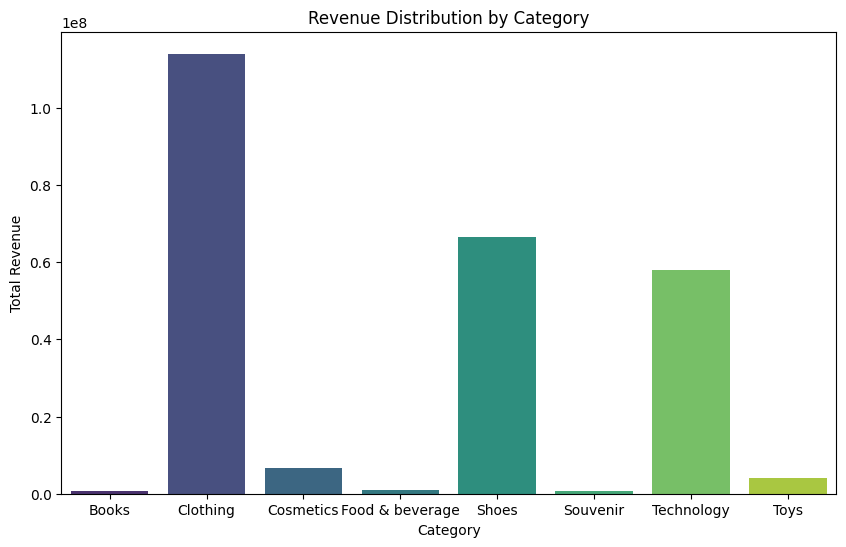

In [ ]:
data['revenue'] = data['quantity'] * data['price']

# Group by category
category_revenue = data.groupby('category')['revenue'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='revenue', data=category_revenue, palette='viridis')
plt.title('Revenue Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.show()

The bar plot of revenue distribution across categories reveals that Clothing generates the highest total revenue among all categories. This suggests that the Clothing category is the primary revenue driver for the business.

Key takeaways include:

*   Focus on Clothing: Since Clothing is the most profitable category, targeted marketing campaigns, promotional offers, and inventory optimization for clothing items should be prioritized.
*  Upselling Opportunities: Explore opportunities to upsell premium clothing items or introduce exclusive collections to further boost revenue.
*   Cross-Selling Potential: Pair clothing items with complementary categories like Shoes or Accessories to enhance overall sales.
*   Customer Insights: Analyze customer preferences within the Clothing category to refine offerings and attract repeat customers.

















**Preferred Payment Methods**

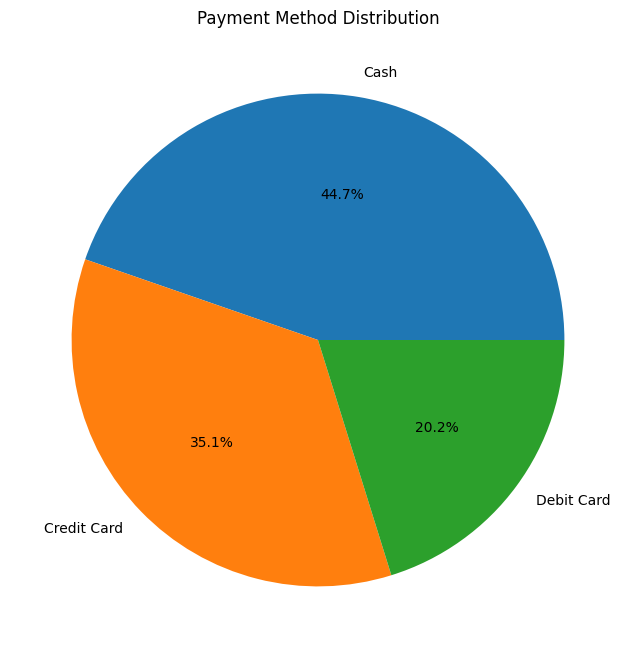

In [ ]:
payment_counts = data['payment_method'].value_counts()
payment_counts.plot.pie(autopct='%1.1f%%', figsize=(8, 8), title='Payment Method Distribution')
plt.ylabel('')
plt.show()




*   Cash is the most commonly used payment method, indicating a strong preference for immediate, non-digital transactions.
*  This trend might reflect customer trust or convenience factors, especially for lower-value purchases or in regions with limited card adoption.

*  Credit card payments make up a significant portion, likely due to larger purchases or customer preference for reward points and installment options.
*   This provides an opportunity to introduce incentives like cashback or reward programs for credit card users to encourage loyalty.





**Mall Performanc**e

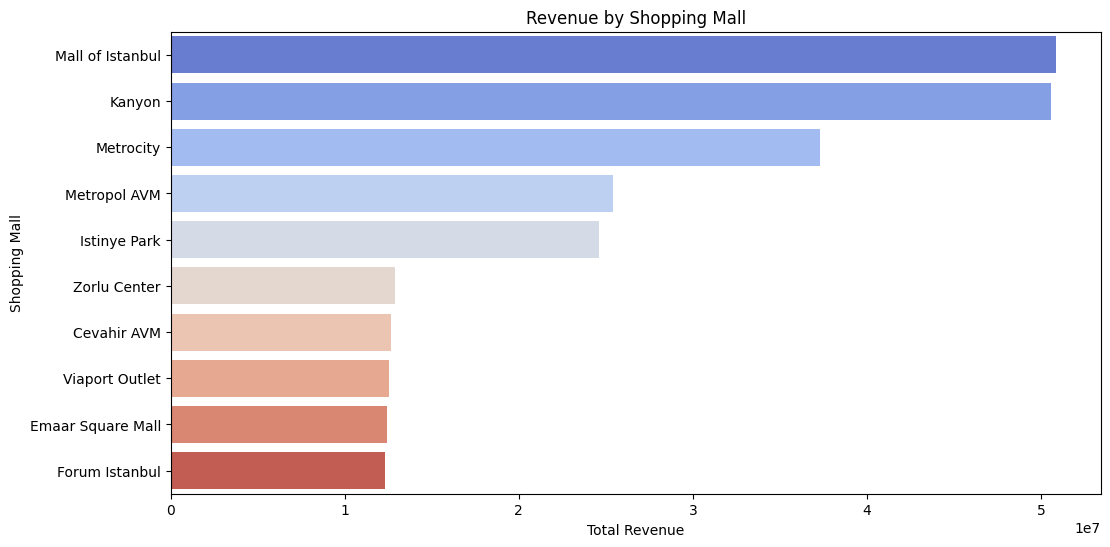

In [ ]:
mall_revenue = data.groupby('shopping_mall')['revenue'].sum().reset_index()
mall_revenue = mall_revenue.sort_values(by='revenue', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='revenue', y='shopping_mall', data=mall_revenue, palette='coolwarm')
plt.title('Revenue by Shopping Mall')
plt.xlabel('Total Revenue')
plt.ylabel('Shopping Mall')
plt.show()




*   Mall of Istanbul and Kanyon are the top-performing malls in terms of revenue. This indicates strong customer traffic, effective product placement, or a favorable demographic for these locations.
*  These malls should be prioritized for premium product launches, exclusive events, and targeted marketing campaigns to sustain and further enhance their performance.


*  Forum Istanbul, Emaar Square Mall, Viaport Outlet, Cevahir AVM, and Zorlu Center generate the least revenue among the malls analyzed. This suggests potential challenges, such as lower footfall or ineffective marketing strategies.
*   A detailed analysis of customer preferences, mall traffic patterns, and competition in the area could help identify specific reasons for its underperformance.





**Age Distribution of Customers**

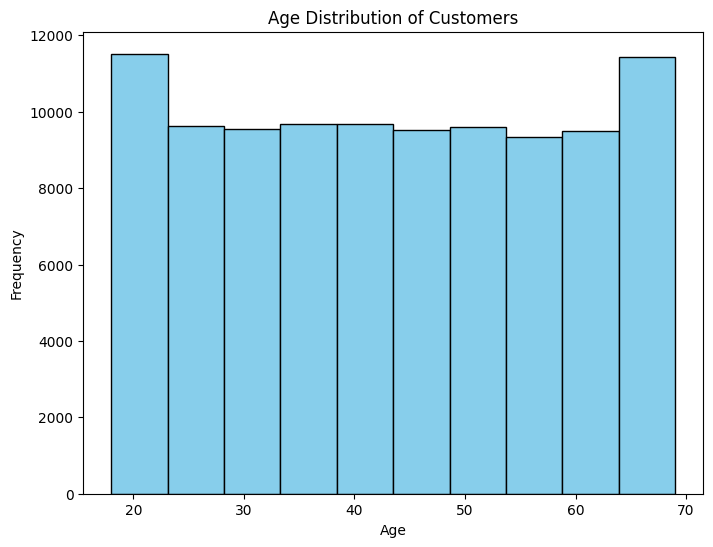

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(data['age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


**Category Popularity Across Malls**

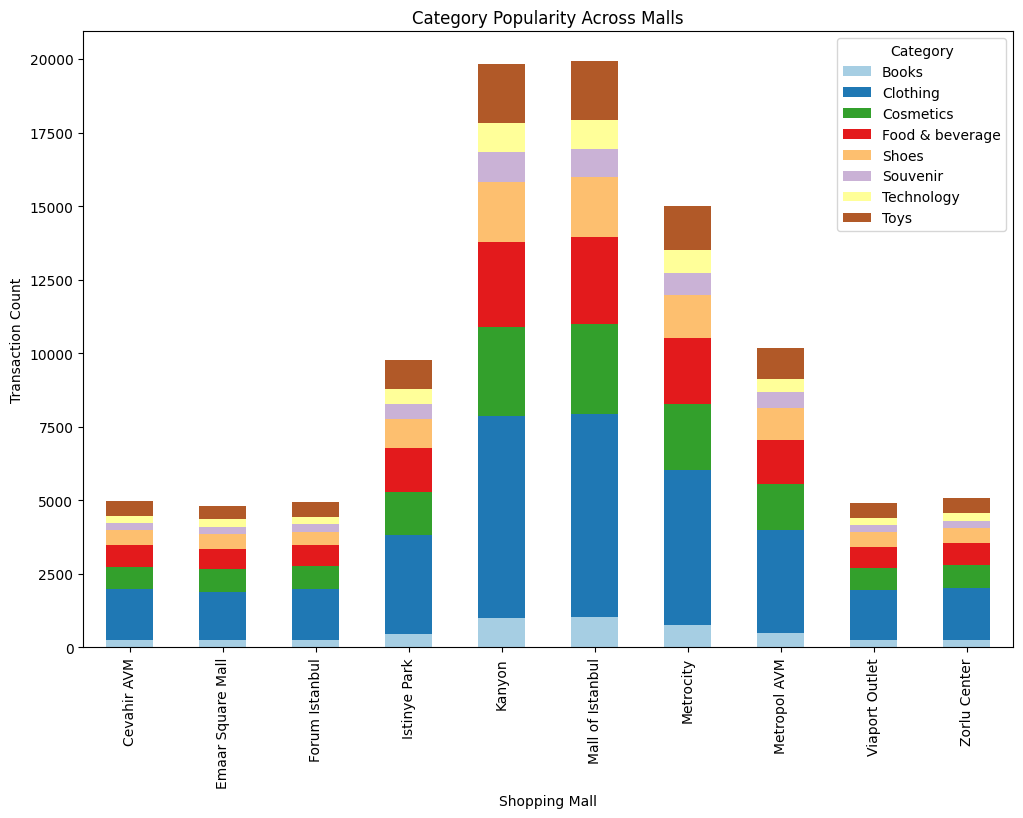

In [ ]:
category_mall = data.groupby(['shopping_mall', 'category']).size().unstack()

category_mall.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='Paired')
plt.title('Category Popularity Across Malls')
plt.xlabel('Shopping Mall')
plt.ylabel('Transaction Count')
plt.legend(title='Category')
plt.show()


**Gender vs. Category Preference**

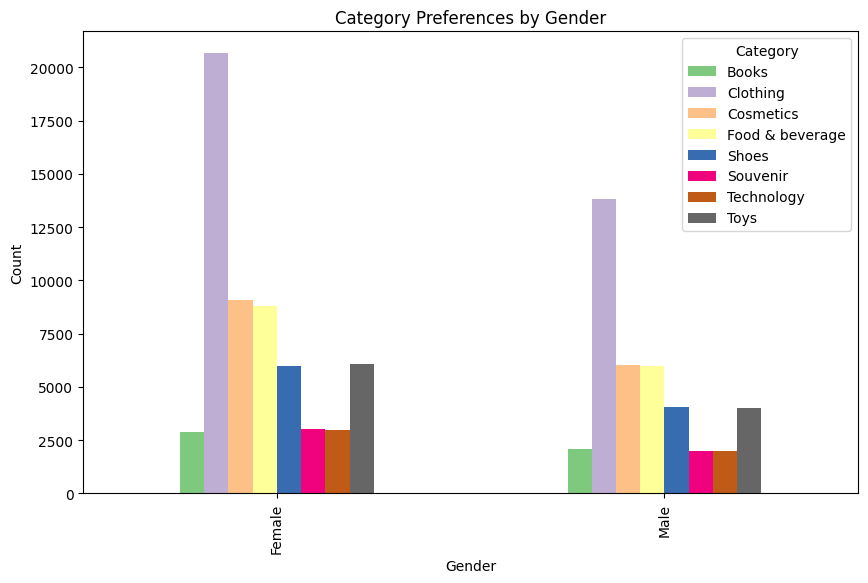

In [ ]:
gender_category = data.groupby(['gender', 'category']).size().unstack()

gender_category.plot(kind='bar', figsize=(10, 6), colormap='Accent')
plt.title('Category Preferences by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Category')
plt.show()


**Revenue Growth Over Time**

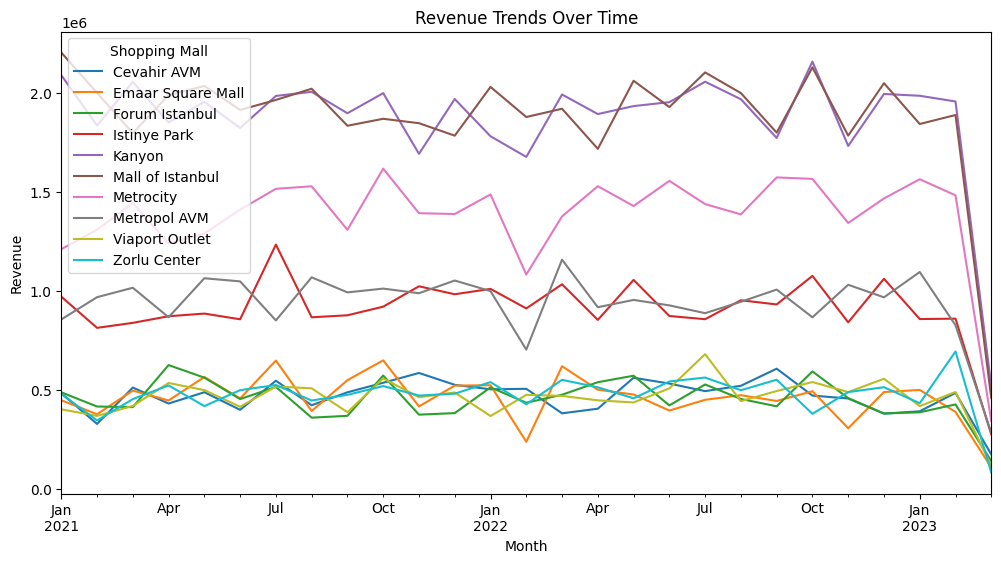

In [ ]:
data['invoice_date'] = pd.to_datetime(data['invoice_date'], format='%d-%m-%Y')
revenue_time = data.groupby([data['shopping_mall'], data['invoice_date'].dt.to_period('M')])['revenue'].sum().unstack()

revenue_time.T.plot(figsize=(12, 6))
plt.title('Revenue Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.legend(title='Shopping Mall')
plt.show()


**Day of the Week Analysis**

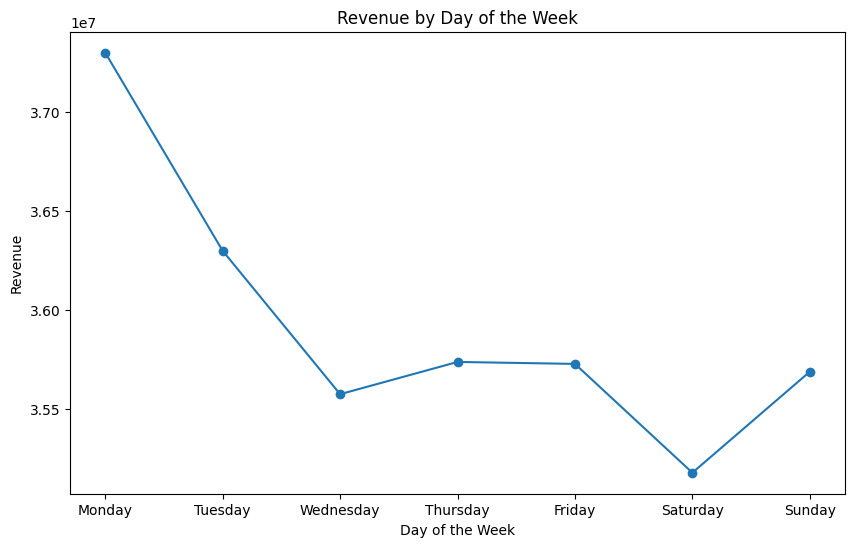

In [ ]:
data['day_of_week'] = data['invoice_date'].dt.day_name()
day_revenue = data.groupby('day_of_week')['revenue'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

day_revenue.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Revenue by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Revenue')
plt.show()


**Predict Likely Purchases**

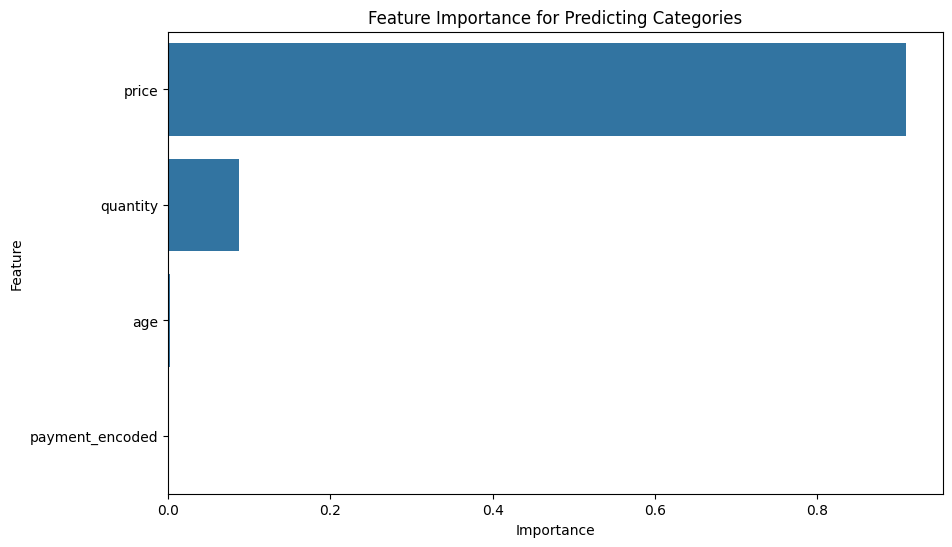

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Encode categories and payment methods
data['category_encoded'] = data['category'].astype('category').cat.codes
data['payment_encoded'] = data['payment_method'].astype('category').cat.codes

# Features and target
X = data[['age', 'quantity', 'price', 'payment_encoded']]
y = data['category_encoded']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance for Predicting Categories')
plt.show()


**Category Pairwise Correlation Heatmap**

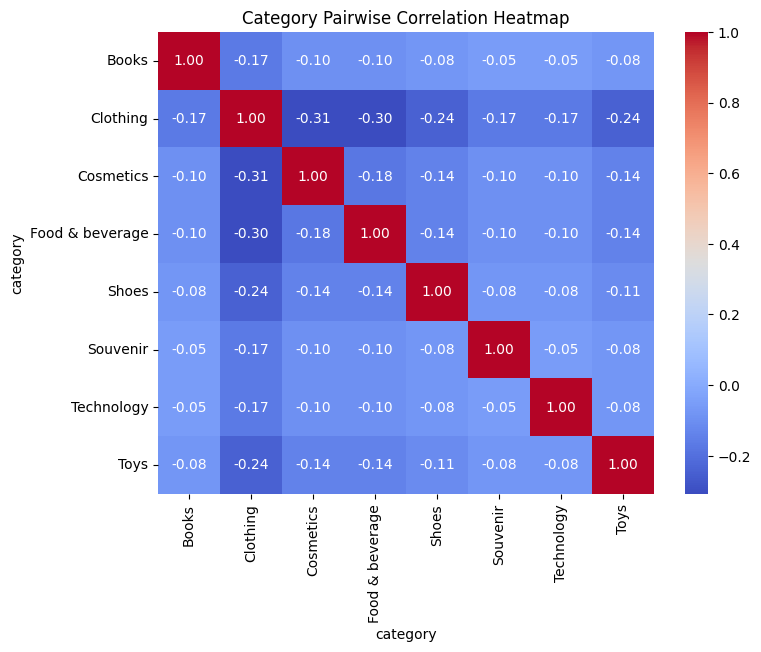

In [ ]:
# Each invoice corresponds to one row; each column represents a category
basket = data.groupby(['invoice_no', 'category'])['quantity'].sum().unstack().fillna(0)
basket[basket > 0] = 1  # Convert to binary format (0 or 1 for presence of category)

# Calculate the correlation matrix
correlation_matrix = basket.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Category Pairwise Correlation Heatmap')
plt.show()


**Price vs. Quantity for Each Category**

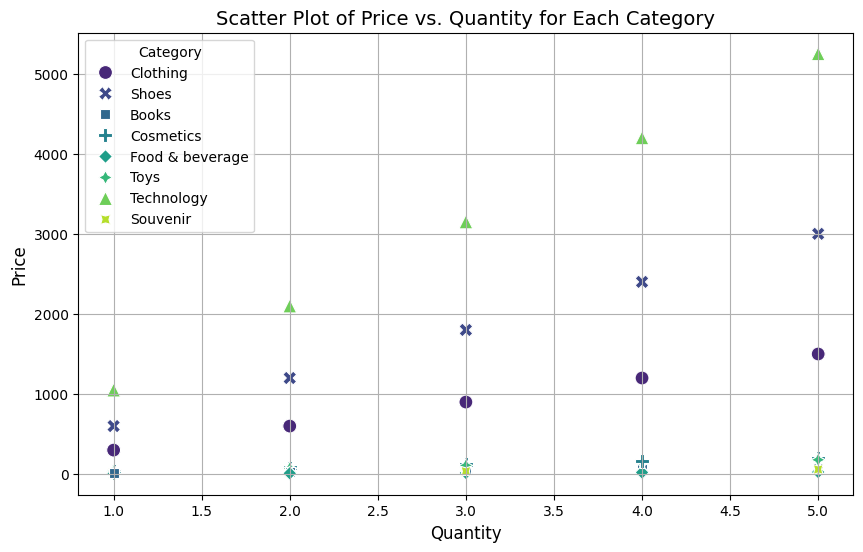

In [ ]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='quantity', y='price', hue='category', style='category', palette='viridis', s=100)

# Adding labels and title
plt.title('Scatter Plot of Price vs. Quantity for Each Category', fontsize=14)
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(title='Category')
plt.grid(True)

# Show the plot
plt.show()

### **Conclusion and Insights from the Analysis**

1. **Perform Market Basket Analysis**: Identifying Categories Frequently Purchased Together.


*   Frequent Itemsets: The analysis identified that certain product categories, such as Clothing and Shoes, are frequently purchased together.
*   Customer Preferences: Customers tend to combine purchases in complementary categories, suggesting a pattern in shopping behavior.



*   Opportunities for Bundling:
      1. Retailers can create bundle offers for frequently purchased categories, such as discounts on shoes when buying clothing.  
      2. Offer promotions like "Buy Clothing, Get Discounts on Accessories" to encourage multi-category purchases.

2. **Upselling and Cross-Selling Opportunities**

 Upselling:

*   For high-revenue categories like Clothing and Shoes, promote premium
versions of these products.

*  Highlight higher-priced items with added benefits, such as premium-quality fabrics or branded footwear.

Cross-Selling:
*  Leverage complementary items to increase the average transaction value.
For example:

     1.Cross-sell Cosmetics with Clothing purchases.

     2.Pair Books with lifestyle products like Toys or Food & Beverages.


*  Utilize strategic product placement in stores or online to encourage such purchases.  


**3. Predicting Likely Categories for Customers**

Customer Demographics:



*   Younger customers (ages 20–30) are more likely to purchase categories like Clothing and Shoes.
*   Older customers (ages 50+) show a preference for categories like Books and Toys.




*   Gender-specific preferences indicate that Clothing and Cosmetics are popular among females, while males prefer Shoes and Books.







**Recommendation Systems:**


*  Implement personalized recommendations using customer purchasing history, demographics, and shopping trends.
*   Recommend Shoes or Accessories to a customer who has recently purchased Clothing.


*   Suggest Food & Beverages for customers frequently buying Toys, to target family-oriented shoppers.


**4. Marketing Strategies for Low-Performing Malls**


*   Low-Performing Malls Identified:

Forum Istanbul, Emaar Square Mall, Viaport Outlet, Cevahir AVM, and Zorlu Center are underperforming in revenue.


**Strategies to Improve Performance:**

1.Customer Engagement:

Organize events like seasonal sales, live performances, or exclusive product launches to attract foot traffic.

2.Promotions and Discounts:

Provide mall-specific promotions, such as "Spend ₹X and Get ₹Y Off" to incentivize spending.

3.Local Demographics:

Tailor product offerings based on local preferences. For example, analyze customer profiles to determine the most demanded categories in each area.

4.Improve Amenities:

Enhance the customer experience by upgrading facilities, such as better parking, free Wi-Fi, or child-friendly zones.

5.Digital Marketing:

Use targeted social media campaigns focusing on the local community to drive awareness and engagement.


